In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set()

In [3]:
dataset = pd.read_csv('data.csv')

In [4]:
dataset.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
rowid                9564 non-null int64
kepid                9564 non-null int64
kepoi_name           9564 non-null object
kepler_name          2294 non-null object
koi_disposition      9564 non-null object
koi_pdisposition     9564 non-null object
koi_score            8054 non-null float64
koi_fpflag_nt        9564 non-null int64
koi_fpflag_ss        9564 non-null int64
koi_fpflag_co        9564 non-null int64
koi_fpflag_ec        9564 non-null int64
koi_period           9564 non-null float64
koi_period_err1      9110 non-null float64
koi_period_err2      9110 non-null float64
koi_time0bk          9564 non-null float64
koi_time0bk_err1     9110 non-null float64
koi_time0bk_err2     9110 non-null float64
koi_impact           9201 non-null float64
koi_impact_err1      9110 non-null float64
koi_impact_err2      9110 non-null float64
koi_duration         9564 non-null float64
koi_du

In [6]:
# Clean the Data Frame by removing all labels, and error values
dataset = dataset.drop(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_tce_delivname', 
                     'koi_period_err1', 'koi_period_err2', 
                     'koi_time0bk_err1', 'koi_time0bk_err2', 
                     'koi_impact_err1', 'koi_impact_err2',
                     'koi_depth_err1', 'koi_depth_err2', 
                     'koi_prad_err1', 'koi_prad_err2', 
                     'koi_insol_err1', 'koi_insol_err2',
                     'koi_steff_err1', 'koi_steff_err2', 
                     'koi_slogg_err1', 'koi_slogg_err2', 
                     'koi_srad_err1', 'koi_srad_err2', 
                     'koi_duration_err1', 'koi_duration_err2', 
                     'koi_teq_err1', 'koi_teq_err2'], axis=1)
dataset.head()

,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,...,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,170.538750,0.146,...,793.0,93.59,35.8,1.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,162.513840,0.586,...,443.0,9.11,25.8,2.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,175.850252,0.969,...,638.0,39.30,76.3,1.0,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,170.307565,1.276,...,1395.0,891.96,505.6,1.0,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,171.595550,0.701,...,1406.0,926.16,40.9,1.0,6031.0,4.438,1.046,288.75488,48.226200,15.509


In [7]:
dataset.rename(columns={'koi_disposition':'planet_disposition',
                     'koi_score':'planet_disp_confidence',
                     'koi_fpflag_nt':'flag_nTransitLk', 
                     'koi_fpflag_ss':'flag_scndEvent', 
                     'koi_fpflag_co':'flag_centroidOffset', 
                     'koi_fpflag_ec':'flag_ephMatch', 
                     'koi_period':'orbital_period',
                     'koi_time0bk':'transit_epoch',
                     'koi_impact':'impact_parameter',
                     'koi_duration':'transit_duration',
                     'koi_depth':'transit_depth', 
                     'koi_prad':'planetary_radius', 
                     'koi_teq':'equ_temp',
                     'koi_insol':'insolation_flux',
                     'koi_model_snr':'transit_sigToNoise',
                     'koi_steff':'stellar_eff_temp',
                     'koi_slogg':'stellar_surf_gravity',
                     'koi_srad':'stellar_radius',
                     'ra':'right_acension',
                     'dec':'declination',
                     'koi_kepmag':'kepler_magnitude'
                    }, inplace = True)

In [11]:
dataset.head().T

,0,1,2,3,4
planet_disposition,CONFIRMED,CONFIRMED,FALSE POSITIVE,FALSE POSITIVE,CONFIRMED
koi_pdisposition,CANDIDATE,CANDIDATE,FALSE POSITIVE,FALSE POSITIVE,CANDIDATE
planet_disp_confidence,1,0.969,0,0,1
flag_nTransitLk,0,0,0,0,0
flag_scndEvent,0,0,1,1,0
flag_centroidOffset,0,0,0,0,0
flag_ephMatch,0,0,0,0,0
orbital_period,9.48804,54.4184,19.8991,1.73695,2.52559
transit_epoch,170.539,162.514,175.85,170.308,171.596
impact_parameter,0.146,0.586,0.969,1.276,0.701


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 23 columns):
planet_disposition        9564 non-null object
koi_pdisposition          9564 non-null object
planet_disp_confidence    8054 non-null float64
flag_nTransitLk           9564 non-null int64
flag_scndEvent            9564 non-null int64
flag_centroidOffset       9564 non-null int64
flag_ephMatch             9564 non-null int64
orbital_period            9564 non-null float64
transit_epoch             9564 non-null float64
impact_parameter          9201 non-null float64
transit_duration          9564 non-null float64
transit_depth             9201 non-null float64
planetary_radius          9201 non-null float64
equ_temp                  9201 non-null float64
insolation_flux           9243 non-null float64
transit_sigToNoise        9201 non-null float64
koi_tce_plnt_num          9218 non-null float64
stellar_eff_temp          9201 non-null float64
stellar_surf_gravity      9201 non-null

In [10]:
def printNullValues(df):
    total = df.isnull().sum().sort_values(ascending = False)
    total = total[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = total * 100 / len(df)
    percent = percent[df.isnull().sum().sort_values(ascending = False) != 0]
    concat = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
    print (concat)
    print ( "-------------")
    
printNullValues(dataset)

                        Total    Percent
planet_disp_confidence   1510  15.788373
transit_depth             363   3.795483
impact_parameter          363   3.795483
stellar_radius            363   3.795483
stellar_surf_gravity      363   3.795483
stellar_eff_temp          363   3.795483
transit_sigToNoise        363   3.795483
equ_temp                  363   3.795483
planetary_radius          363   3.795483
koi_tce_plnt_num          346   3.617733
insolation_flux           321   3.356336
kepler_magnitude            1   0.010456
-------------


## ---------------------------------------------------------------------------------------
## Exploring Categorical Variables
## ---------------------------------------------------------------------------------------

In [12]:
cat_variables = [var for var in dataset.columns if dataset[var].dtype=='O']
dataset[cat_variables].head()

,planet_disposition,koi_pdisposition
0,CONFIRMED,CANDIDATE
1,CONFIRMED,CANDIDATE
2,FALSE POSITIVE,FALSE POSITIVE
3,FALSE POSITIVE,FALSE POSITIVE
4,CONFIRMED,CANDIDATE


In [13]:
dataset[cat_variables].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 2 columns):
planet_disposition    9564 non-null object
koi_pdisposition      9564 non-null object
dtypes: object(2)
memory usage: 149.6+ KB


In [14]:
dataset[cat_variables].describe()

,planet_disposition,koi_pdisposition
count,9564,9564
unique,3,2
top,FALSE POSITIVE,FALSE POSITIVE
freq,5023,5068


In [15]:
dataset[cat_variables].isnull().sum()

planet_disposition    0
koi_pdisposition      0
dtype: int64

In [16]:
dataset[cat_variables].isnull().sum()/len(dataset)

planet_disposition    0.0
koi_pdisposition      0.0
dtype: float64

### Explore `planet_disposition` variable

In [17]:
print('planet_disposition contains', len(dataset.planet_disposition.unique()), 'labels')

planet_disposition contains 3 labels


In [24]:
dataset.planet_disposition.unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

Text(0.5, 1, 'planet_disposition')

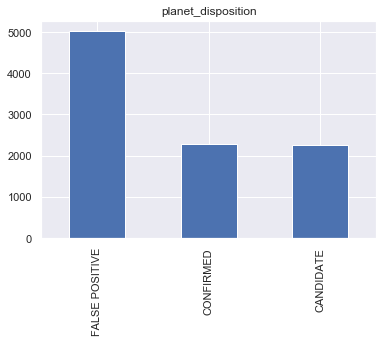

In [23]:
dataset.planet_disposition.value_counts().plot.bar()
plt.savefig('images/KOI_planet_disposition_type.png', 
            dpi=300, bbox_inches='tight')
plt.title('planet_disposition')

### Explore `koi_pdisposition` variable

In [33]:
print('koi_pdisposition contains', len(dataset.koi_pdisposition.unique()), 'labels')

koi_pdisposition contains 2 labels


In [34]:
dataset['koi_pdisposition'].unique()

array(['CANDIDATE', 'FALSE POSITIVE'], dtype=object)

In [35]:
dataset.koi_pdisposition.value_counts()

FALSE POSITIVE    5068
CANDIDATE         4496
Name: koi_pdisposition, dtype: int64

In [38]:
dataset.koi_pdisposition.value_counts()*100/len(dataset)

FALSE POSITIVE    52.990381
CANDIDATE         47.009619
Name: koi_pdisposition, dtype: float64

Text(0.5, 1, 'koi_pdisposition')

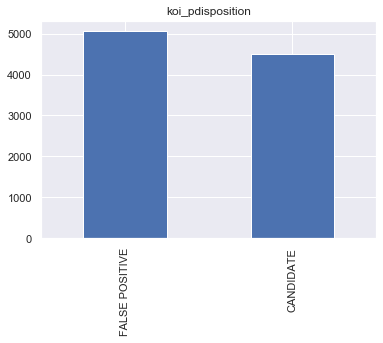

In [24]:
dataset['koi_pdisposition'].value_counts().plot.bar()
plt.savefig('images/KOI_pdisposition.png', 
            dpi=300, bbox_inches='tight')
plt.title('koi_pdisposition')

## ---------------------------------------------------------------------------------------
## Exploring Numerical Variables
## ---------------------------------------------------------------------------------------

In [26]:
numerical = [var for var in dataset.columns if dataset[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 21 numerical variables

The numerical variables are : ['planet_disp_confidence', 'flag_nTransitLk', 'flag_scndEvent', 'flag_centroidOffset', 'flag_ephMatch', 'orbital_period', 'transit_epoch', 'impact_parameter', 'transit_duration', 'transit_depth', 'planetary_radius', 'equ_temp', 'insolation_flux', 'transit_sigToNoise', 'koi_tce_plnt_num', 'stellar_eff_temp', 'stellar_surf_gravity', 'stellar_radius', 'right_acension', 'declination', 'kepler_magnitude']


In [27]:
dataset[numerical].head()

,planet_disp_confidence,flag_nTransitLk,flag_scndEvent,flag_centroidOffset,flag_ephMatch,orbital_period,transit_epoch,impact_parameter,transit_duration,transit_depth,...,equ_temp,insolation_flux,transit_sigToNoise,koi_tce_plnt_num,stellar_eff_temp,stellar_surf_gravity,stellar_radius,right_acension,declination,kepler_magnitude
0,1.000,0,0,0,0,9.488036,170.538750,0.146,2.95750,615.8,...,793.0,93.59,35.8,1.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,0.969,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,...,443.0,9.11,25.8,2.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,0.000,0,1,0,0,19.899140,175.850252,0.969,1.78220,10829.0,...,638.0,39.30,76.3,1.0,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,0.000,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,...,1395.0,891.96,505.6,1.0,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,1.000,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,...,1406.0,926.16,40.9,1.0,6031.0,4.438,1.046,288.75488,48.226200,15.509


In [28]:
dataset[numerical].isnull().sum()

planet_disp_confidence    1510
flag_nTransitLk              0
flag_scndEvent               0
flag_centroidOffset          0
flag_ephMatch                0
orbital_period               0
transit_epoch                0
impact_parameter           363
transit_duration             0
transit_depth              363
planetary_radius           363
equ_temp                   363
insolation_flux            321
transit_sigToNoise         363
koi_tce_plnt_num           346
stellar_eff_temp           363
stellar_surf_gravity       363
stellar_radius             363
right_acension               0
declination                  0
kepler_magnitude             1
dtype: int64

In [29]:
dataset[numerical].isnull().sum()*100/len(dataset)

planet_disp_confidence    15.788373
flag_nTransitLk            0.000000
flag_scndEvent             0.000000
flag_centroidOffset        0.000000
flag_ephMatch              0.000000
orbital_period             0.000000
transit_epoch              0.000000
impact_parameter           3.795483
transit_duration           0.000000
transit_depth              3.795483
planetary_radius           3.795483
equ_temp                   3.795483
insolation_flux            3.356336
transit_sigToNoise         3.795483
koi_tce_plnt_num           3.617733
stellar_eff_temp           3.795483
stellar_surf_gravity       3.795483
stellar_radius             3.795483
right_acension             0.000000
declination                0.000000
kepler_magnitude           0.010456
dtype: float64

In [30]:
def printNullValues(df):
    total = df.isnull().sum().sort_values(ascending = False)
    total = total[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = total * 100 / len(df)
    percent = percent[df.isnull().sum().sort_values(ascending = False) != 0]
    concat = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
    print (concat)
    print ( "-------------")
    
printNullValues(dataset)

                        Total    Percent
planet_disp_confidence   1510  15.788373
transit_depth             363   3.795483
impact_parameter          363   3.795483
stellar_radius            363   3.795483
stellar_surf_gravity      363   3.795483
stellar_eff_temp          363   3.795483
transit_sigToNoise        363   3.795483
equ_temp                  363   3.795483
planetary_radius          363   3.795483
koi_tce_plnt_num          346   3.617733
insolation_flux           321   3.356336
kepler_magnitude            1   0.010456
-------------


### Outliers in numerical variables

In [31]:
numerical = [var for var in dataset.columns if dataset[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 21 numerical variables

The numerical variables are : ['planet_disp_confidence', 'flag_nTransitLk', 'flag_scndEvent', 'flag_centroidOffset', 'flag_ephMatch', 'orbital_period', 'transit_epoch', 'impact_parameter', 'transit_duration', 'transit_depth', 'planetary_radius', 'equ_temp', 'insolation_flux', 'transit_sigToNoise', 'koi_tce_plnt_num', 'stellar_eff_temp', 'stellar_surf_gravity', 'stellar_radius', 'right_acension', 'declination', 'kepler_magnitude']


In [32]:
num_var = ['planet_disp_confidence', 'flag_nTransitLk', 'flag_scndEvent', 'flag_centroidOffset', 'flag_ephMatch', 
           'orbital_period', 'transit_epoch', 'impact_parameter', 'transit_duration', 'transit_depth', 
           'planetary_radius', 'equ_temp', 'insolation_flux', 'transit_sigToNoise', 'koi_tce_plnt_num', 
           'stellar_eff_temp', 'stellar_surf_gravity', 'stellar_radius', 'right_acension', 'declination', 'kepler_magnitude']

In [33]:
print(round(dataset[numerical].describe()), 2)

       planet_disp_confidence  flag_nTransitLk  flag_scndEvent  \
count                  8054.0           9564.0          9564.0   
mean                      0.0              0.0             0.0   
std                       0.0              0.0             0.0   
min                       0.0              0.0             0.0   
25%                       0.0              0.0             0.0   
50%                       0.0              0.0             0.0   
75%                       1.0              0.0             0.0   
max                       1.0              1.0             1.0   

       flag_centroidOffset  flag_ephMatch  orbital_period  transit_epoch  \
count               9564.0         9564.0          9564.0         9564.0   
mean                   0.0            0.0            76.0          166.0   
std                    0.0            0.0          1335.0           68.0   
min                    0.0            0.0             0.0          121.0   
25%                    0.

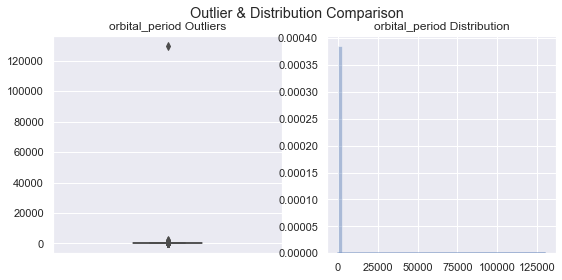

In [34]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
sns.boxplot(y='orbital_period', data=dataset, width=0.3, ax=ax1)
ax1.set_title('orbital_period Outliers')
ax1.set_ylabel('')
sns.distplot(dataset['orbital_period'], ax=ax2)
ax2.set_title('orbital_period Distribution')
ax2.set_xlabel('')
fig.suptitle('Outlier & Distribution Comparison')
plt.savefig('images/KOI_outliers1.png', 
            dpi=300, bbox_inches='tight')

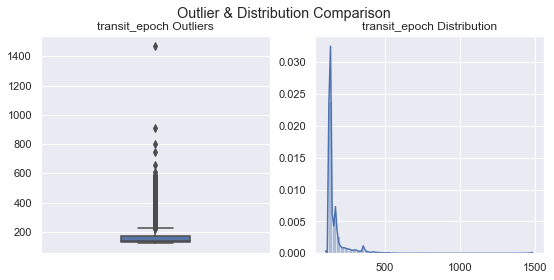

In [38]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
sns.boxplot(y='transit_epoch', data=dataset, width=0.3, ax=ax1)
ax1.set_title('transit_epoch Outliers')
ax1.set_ylabel('')
sns.distplot(dataset['transit_epoch'], ax=ax2)
ax2.set_title('transit_epoch Distribution')
ax2.set_xlabel('')

fig.suptitle('Outlier & Distribution Comparison')
plt.savefig('images/KOI_outliers2.png', 
            dpi=300, bbox_inches='tight')

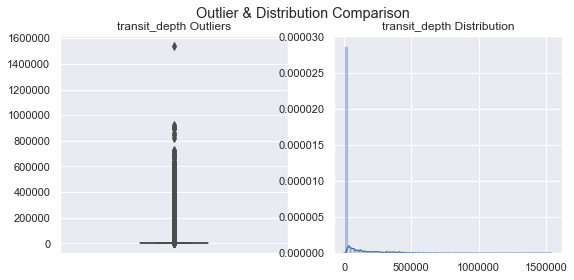

In [39]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
sns.boxplot(y='transit_depth', data=dataset, width=0.3, ax=ax1)
ax1.set_title('transit_depth Outliers')
ax1.set_ylabel('')
sns.distplot(dataset['transit_depth'], ax=ax2)
ax2.set_title('transit_depth Distribution')
ax2.set_xlabel('')

fig.suptitle('Outlier & Distribution Comparison')
plt.savefig('images/KOI_outliers3.png', 
            dpi=300, bbox_inches='tight')

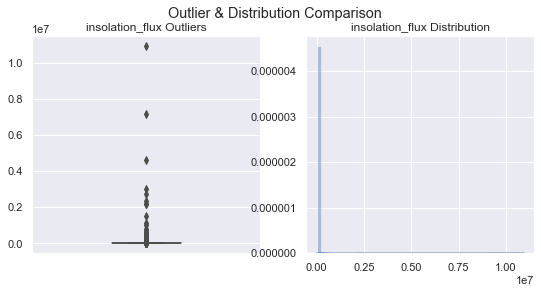

In [40]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
sns.boxplot(y='insolation_flux', data=dataset, width=0.3, ax=ax1)
ax1.set_title('insolation_flux Outliers')
ax1.set_ylabel('')
sns.distplot(dataset['insolation_flux'], ax=ax2)
ax2.set_title('insolation_flux Distribution')
ax2.set_xlabel('')
fig.suptitle('Outlier & Distribution Comparison')
plt.savefig('images/KOI_outliers4.png', 
            dpi=300, bbox_inches='tight')

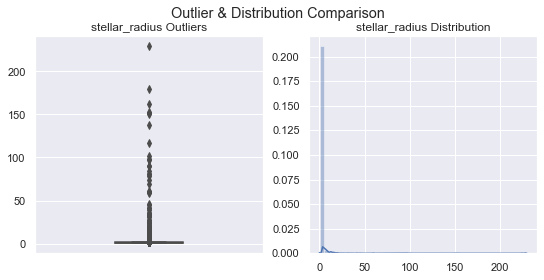

In [41]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
sns.boxplot(y='stellar_radius', data=dataset, width=0.3, ax=ax1)
ax1.set_title('stellar_radius Outliers')
ax1.set_ylabel('')
sns.distplot(dataset['stellar_radius'], ax=ax2)
ax2.set_title('stellar_radius Distribution')
ax2.set_xlabel('')
fig.suptitle('Outlier & Distribution Comparison')
plt.savefig('images/KOI_outliers5.png', 
            dpi=300, bbox_inches='tight')

In [55]:
IQR = dataset.orbital_period.quantile(0.75) - dataset.orbital_period.quantile(0.25)
Lower_fence = dataset.orbital_period.quantile(0.25) - (IQR * 3)
Upper_fence = dataset.orbital_period.quantile(0.75) + (IQR * 3)
print('orbital_period outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

orbital_period outliers are values < -111.21079601300002 or > 154.65965780975003


In [56]:
IQR = dataset.transit_epoch.quantile(0.75) - dataset.transit_epoch.quantile(0.25)
Lower_fence = dataset.transit_epoch.quantile(0.25) - (IQR * 3)
Upper_fence = dataset.transit_epoch.quantile(0.75) + (IQR * 3)
print('transit_epoch outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


transit_epoch outliers are values < 18.963059500000014 or > 284.4932615


In [57]:
IQR = dataset.transit_depth.quantile(0.75) - dataset.transit_depth.quantile(0.25)
Lower_fence = dataset.transit_depth.quantile(0.25) - (IQR * 3)
Upper_fence = dataset.transit_depth.quantile(0.75) + (IQR * 3)
print('transit_depth outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


transit_depth outliers are values < -3780.6 or > 5413.9


In [58]:
IQR = dataset.insolation_flux.quantile(0.75) - dataset.insolation_flux.quantile(0.25)
Lower_fence = dataset.insolation_flux.quantile(0.25) - (IQR * 3)
Upper_fence = dataset.insolation_flux.quantile(0.75) + (IQR * 3)
print('insolation_flux outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


insolation_flux outliers are values < -2530.27 or > 3420.71


In [59]:
IQR = dataset.stellar_radius.quantile(0.75) - dataset.stellar_radius.quantile(0.25)
Lower_fence = dataset.stellar_radius.quantile(0.25) - (IQR * 3)
Upper_fence = dataset.stellar_radius.quantile(0.75) + (IQR * 3)
print('stellar_radius outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


stellar_radius outliers are values < -0.7190000000000001 or > 2.893


### Correlations in numerical variables

In [42]:
correlation = dataset.corr()

In [43]:
len(num_var)

21

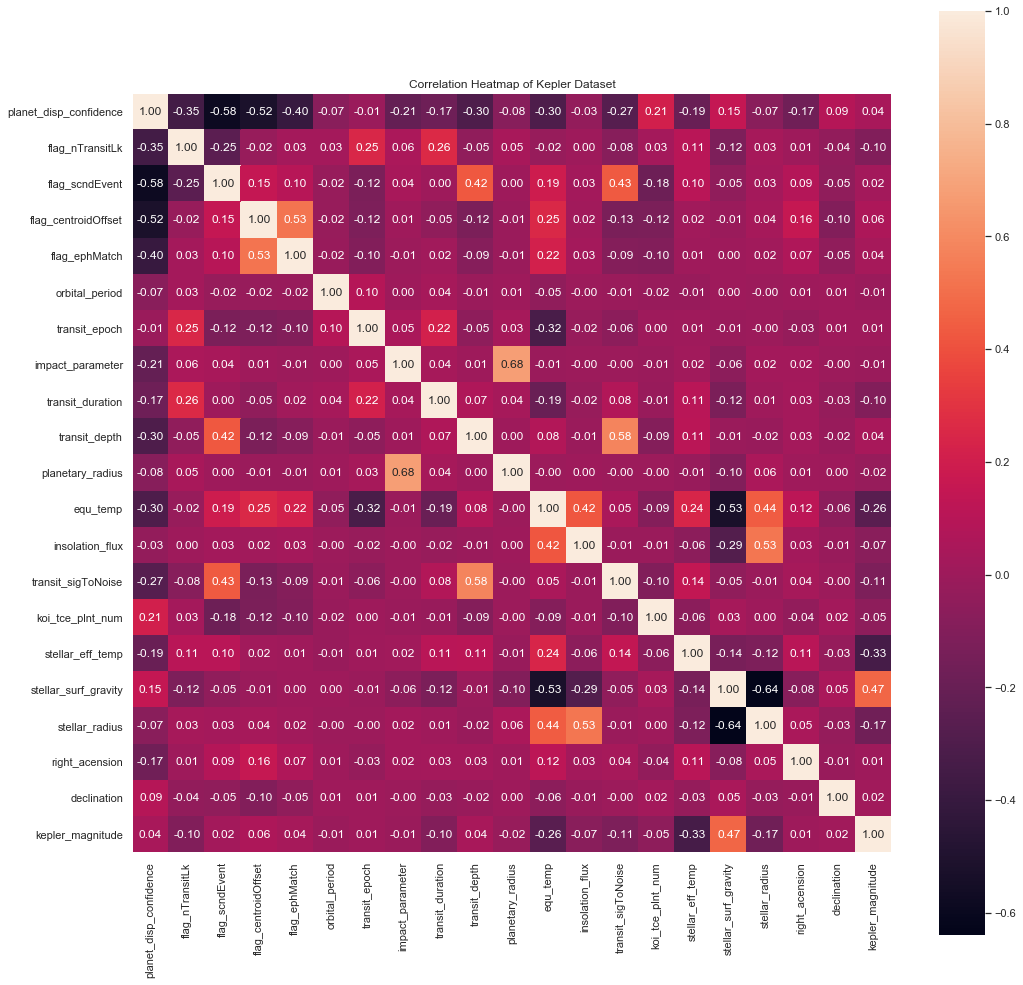

In [44]:
plt.figure(figsize=(17,17))
plt.title('Correlation Heatmap of Kepler Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_ylim(21, 0)
plt.savefig('images/KOI_Corr_plot.png', 
            dpi=300, bbox_inches='tight')
plt.show()

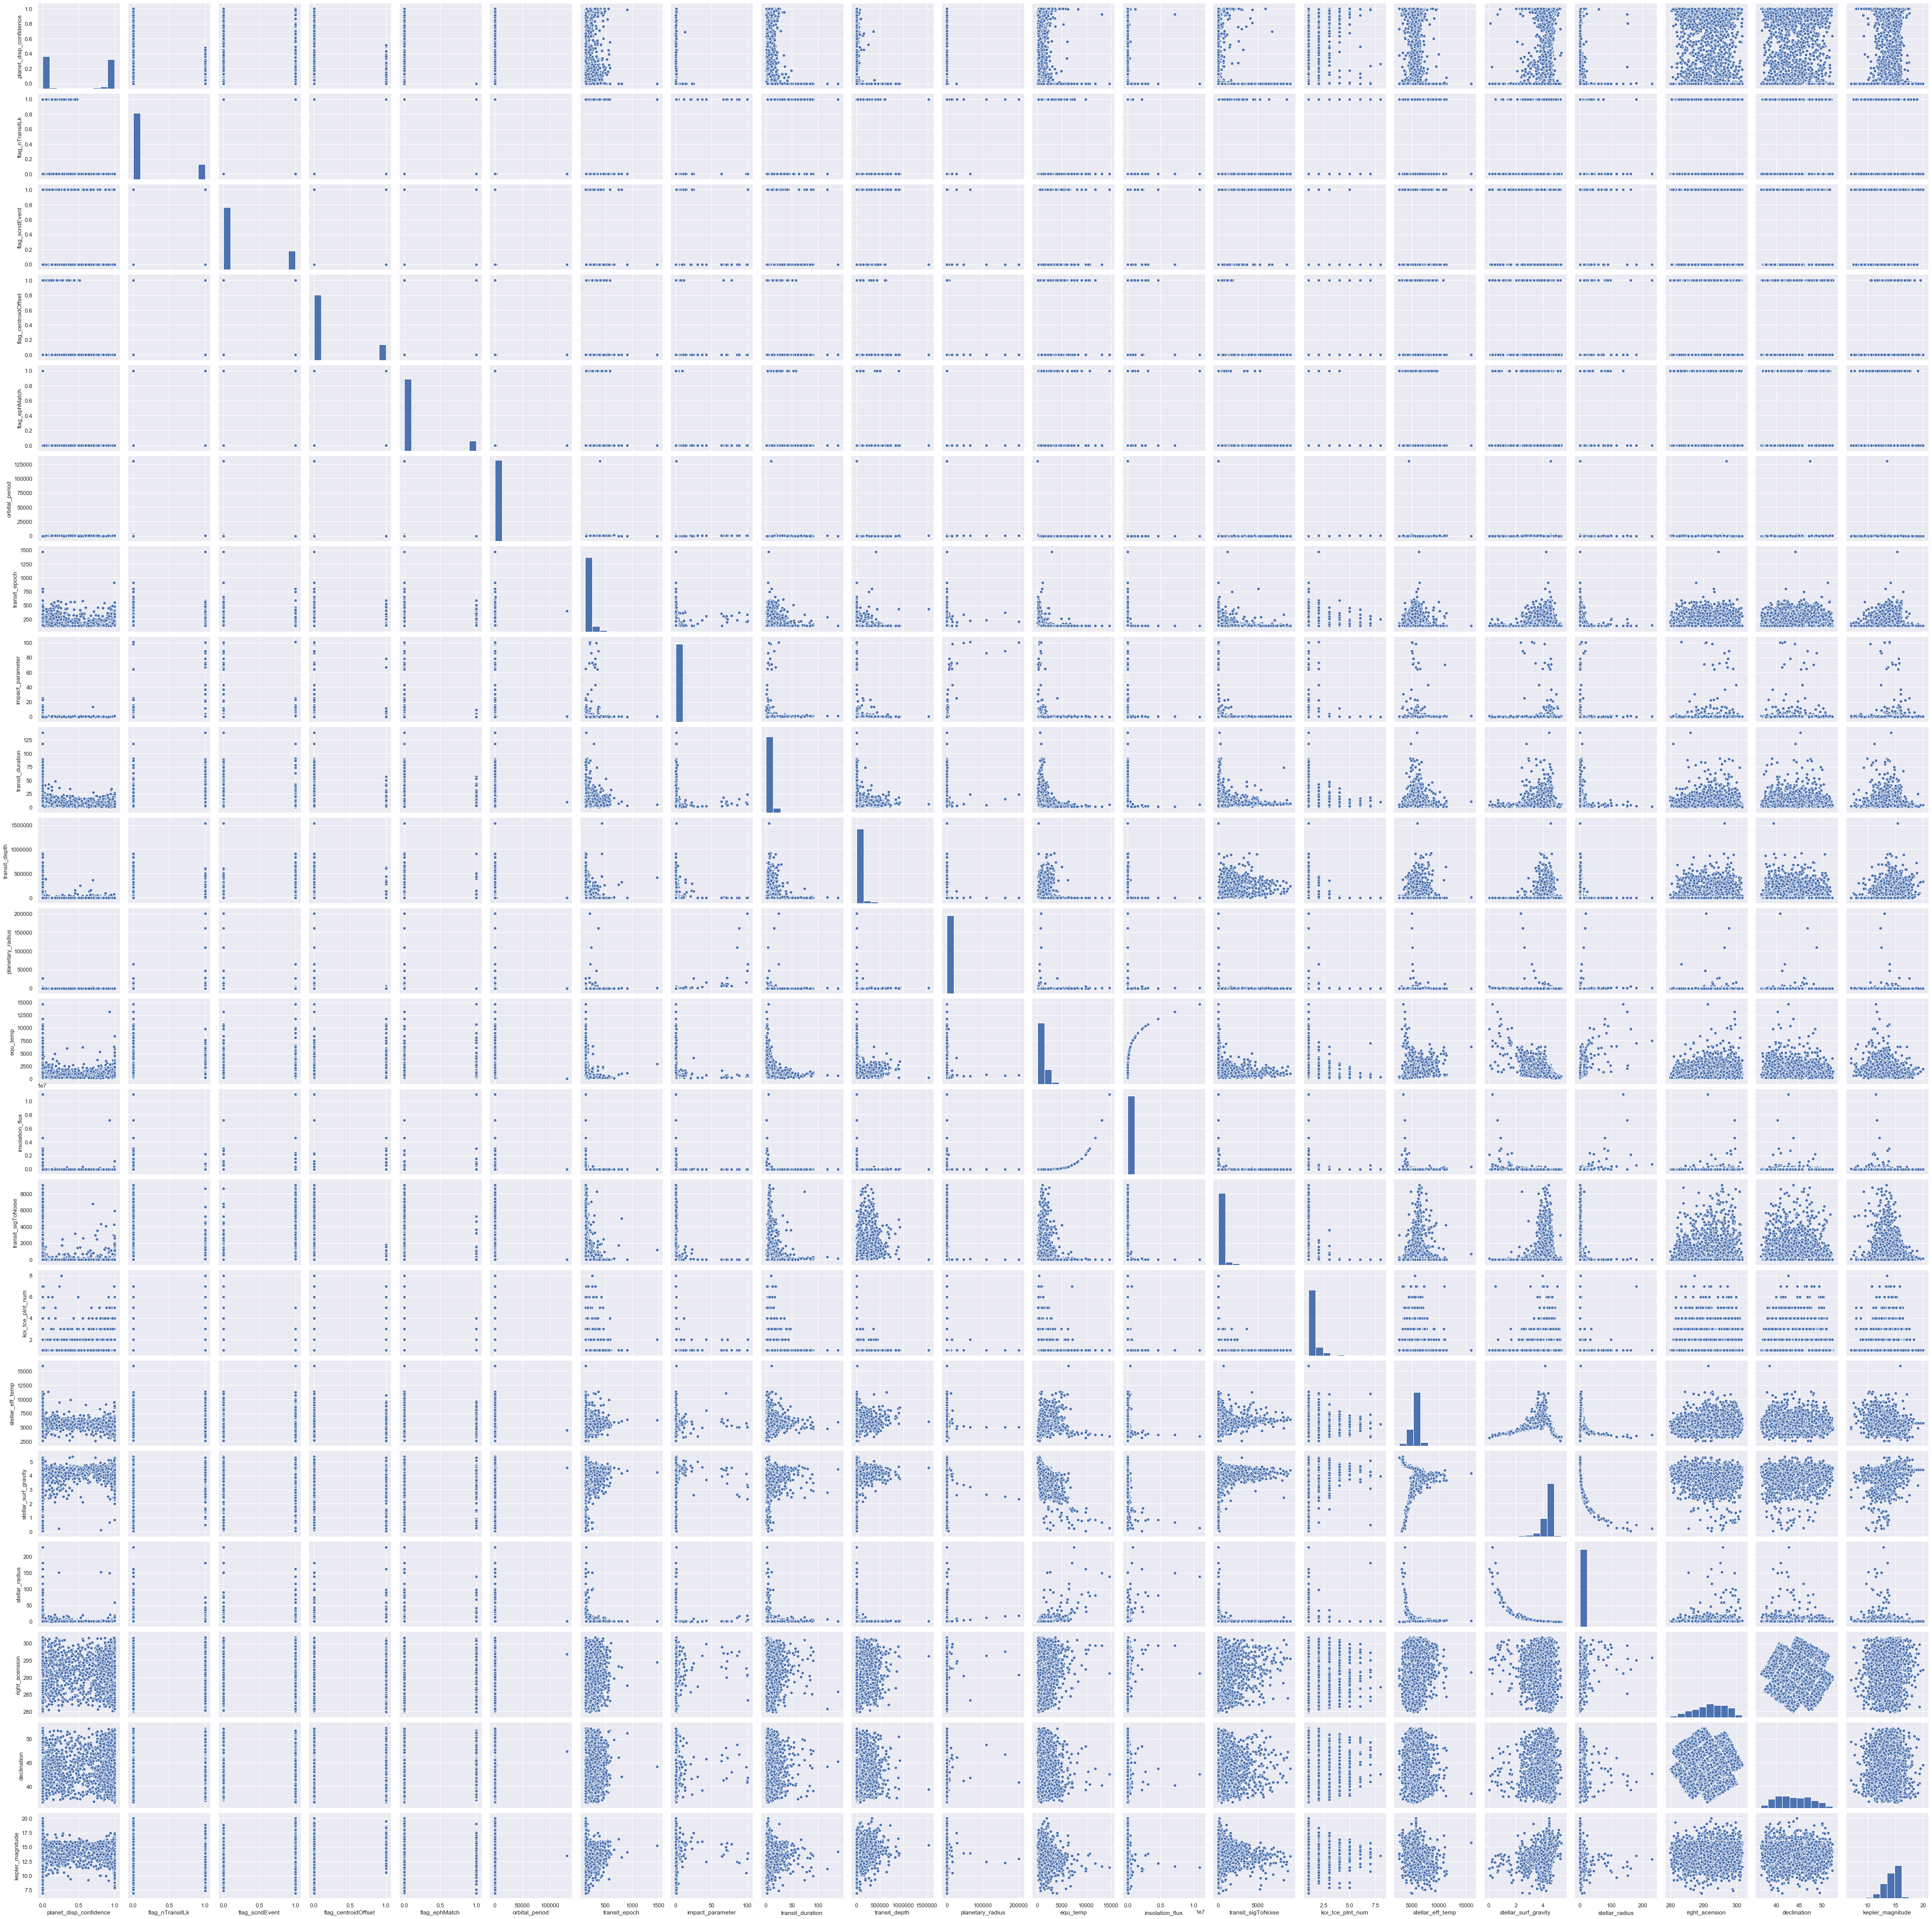

In [71]:
sns.pairplot(dataset[num_var], kind='scatter', diag_kind='hist')
plt.show()

In [70]:
dataset.to_csv('Kepler_dataset_file.csv', index=False, encoding='utf-8')